# Web scraping

## Intro to HTML
HTML - Hyper Text Markup Language (see also [Wikipedia](https://en.wikipedia.org/wiki/HTML))

HTML elements are defined by tags
```
<b>Bold text</b>
```
Tags have attributes
```
<span class="uni">University of Mannheim</span>
```
Tags could be nested
```
<div id="uni-list" class="sfsdf" attribute1="xasdas" attribute2="asfasd">
 <span class="uni">University of Mannheim</span>
 <span class="uni">RWTH Aachen</span>
 <a class="uni">Hello</a>
</div>
```


Here's a [web page example](https://www.uni-mannheim.de/en/academics/programs/). Here's a video that recaps the most important elements of the language: [YouTube](https://youtu.be/salY_Sm6mv4).

## Querying HTML pages with BeautifulSoup

HTML-elements could be selected by name
```
a
```
By ID
```
#uni-list
```
By class
```
.uni
```
Nested selection
```
#uni-list .uni
```

```
#uni-list span.uni
```

See this nice [introduction to CSS selectors](https://developer.mozilla.org/en-US/docs/Web/CSS/CSS_selectors/Selectors_and_combinators).
See also the [BeautifulSoup Documentation](https://beautiful-soup-4.readthedocs.io/en/latest/)

In [1]:
# install BeautifulSoup if needed
!pip install beautifulsoup4

In [2]:
from bs4 import BeautifulSoup  # import the BeautifulSoup class from the bs4 package

In [3]:
# an example HTML document in the form of a string
html_doc = '<html lang="en"><head><title>Test document</title></head><body><div id="uni-list"><div class="sub"><a href="https://www.uni-mannheim.de/" class="uni">University of Mannheim</a></div><div class="sub"><a href="http://rwth-aachen.de" class="uni">RWTH Aachen</a></div></div></body></html>'

# initialize a BeautifulSoup object with the given HTML
soup = BeautifulSoup(html_doc)
type(soup)

bs4.BeautifulSoup

In [4]:
# we can also specify the type of parser we want to use
# they work differently well with non-conforming HTML
soup = BeautifulSoup(html_doc, parser='html.parser')

In [5]:
soup  # let's see what we got

<html lang="en"><head><title>Test document</title></head><body><div id="uni-list"><div class="sub"><a class="uni" href="https://www.uni-mannheim.de/">University of Mannheim</a></div><div class="sub"><a class="uni" href="http://rwth-aachen.de">RWTH Aachen</a></div></div></body></html>

In [6]:
print(soup.prettify())  # add indentation

<html lang="en">
 <head>
  <title>
   Test document
  </title>
 </head>
 <body>
  <div id="uni-list">
   <div class="sub">
    <a class="uni" href="https://www.uni-mannheim.de/">
     University of Mannheim
    </a>
   </div>
   <div class="sub">
    <a class="uni" href="http://rwth-aachen.de">
     RWTH Aachen
    </a>
   </div>
  </div>
 </body>
</html>



## Accessing Elements in the Soup

In [7]:
soup.title  # access the first 'title' element in the soup

<title>Test document</title>

In [8]:
soup.title.text  # get the text inside the first 'title' element

'Test document'

In [9]:
print(soup.div.prettify())  # access the first 'div' element and print it pretty

<div id="uni-list">
 <div class="sub">
  <a class="uni" href="https://www.uni-mannheim.de/">
   University of Mannheim
  </a>
 </div>
 <div class="sub">
  <a class="uni" href="http://rwth-aachen.de">
   RWTH Aachen
  </a>
 </div>
</div>



In [10]:
soup.a  # access the first anchor element (hyperlink)

<a class="uni" href="https://www.uni-mannheim.de/">University of Mannheim</a>

But what if we want to get **all** hyperlinks? We can use **CSS selectors** to achieve this.

In [11]:
result = soup.select('a')  # returns a list of all elements that match the name 'a'
result

[<a class="uni" href="https://www.uni-mannheim.de/">University of Mannheim</a>,
 <a class="uni" href="http://rwth-aachen.de">RWTH Aachen</a>]

In [12]:
soup.select('span')  # the list can also be empty or have only one element

[]

In [13]:
second = soup.select('a')[1]  # we can extract entries from the list just as usual
second

<a class="uni" href="http://rwth-aachen.de">RWTH Aachen</a>

In [14]:
print(second.parent.prettify())  # use '.parent' for navigation

<div class="sub">
 <a class="uni" href="http://rwth-aachen.de">
  RWTH Aachen
 </a>
</div>



In [15]:
for el in second.parents:  # go through all the parents until we reach the top level [document] element
    print(el.name)

div
div
body
html
[document]


In [16]:
for el in second.parent.parent.children:  # go one level up and then one level down again
    print(el)

<div class="sub"><a class="uni" href="https://www.uni-mannheim.de/">University of Mannheim</a></div>
<div class="sub"><a class="uni" href="http://rwth-aachen.de">RWTH Aachen</a></div>


In [17]:
second.parent.previous_sibling  # another way to access the sibling

<div class="sub"><a class="uni" href="https://www.uni-mannheim.de/">University of Mannheim</a></div>

## More advanced selectors

In [18]:
result = soup.select('#uni-list')  # select all elements that have the ID 'uni-list'
len(result)

1

In [19]:
print(result[0].prettify())  # print the element we found in a pretty way

<div id="uni-list">
 <div class="sub">
  <a class="uni" href="https://www.uni-mannheim.de/">
   University of Mannheim
  </a>
 </div>
 <div class="sub">
  <a class="uni" href="http://rwth-aachen.de">
   RWTH Aachen
  </a>
 </div>
</div>



In [20]:
soup.select('.uni')  # select all elements that are of class 'uni'

[<a class="uni" href="https://www.uni-mannheim.de/">University of Mannheim</a>,
 <a class="uni" href="http://rwth-aachen.de">RWTH Aachen</a>]

In [21]:
soup.select('div.sub')  # select all elements that have name 'div' and class 'sub'

[<div class="sub"><a class="uni" href="https://www.uni-mannheim.de/">University of Mannheim</a></div>,
 <div class="sub"><a class="uni" href="http://rwth-aachen.de">RWTH Aachen</a></div>]

In [22]:
soup.find_all('div', class_ = 'sub')  # this also does the trick

[<div class="sub"><a class="uni" href="https://www.uni-mannheim.de/">University of Mannheim</a></div>,
 <div class="sub"><a class="uni" href="http://rwth-aachen.de">RWTH Aachen</a></div>]

In [23]:
soup.select('#uni-list div')  # select all 'div' elements that are descendents of an element with id 'uni-list'

[<div class="sub"><a class="uni" href="https://www.uni-mannheim.de/">University of Mannheim</a></div>,
 <div class="sub"><a class="uni" href="http://rwth-aachen.de">RWTH Aachen</a></div>]

In [24]:
soup.select('div')  # in contrast to the previous query, this also returns the parent-div as well

[<div id="uni-list"><div class="sub"><a class="uni" href="https://www.uni-mannheim.de/">University of Mannheim</a></div><div class="sub"><a class="uni" href="http://rwth-aachen.de">RWTH Aachen</a></div></div>,
 <div class="sub"><a class="uni" href="https://www.uni-mannheim.de/">University of Mannheim</a></div>,
 <div class="sub"><a class="uni" href="http://rwth-aachen.de">RWTH Aachen</a></div>]

## Loading actual web data

In [25]:
# install the requests package if necessary
!pip install requests

In [26]:
import requests

url = "https://www.uni-mannheim.de/en/academics/programs/"

page = requests.get(url).text  # get the content at that URL and store the page source

soup = BeautifulSoup(page)  # initialize beautiful soup

In [27]:
soup  # let's see what we got

<!DOCTYPE html>
<html class="no-js" lang="en">
<head>
<meta charset="utf-8"/>
<!-- 
	This website is powered by TYPO3 - inspiring people to share!
	TYPO3 is a free open source Content Management Framework initially created by Kasper Skaarhoj and licensed under GNU/GPL.
	TYPO3 is copyright 1998-2024 of Kasper Skaarhoj. Extensions are copyright of their respective owners.
	Information and contribution at https://typo3.org/
-->
<title>Programs - University of Mannheim | University of Mannheim</title>
<meta content="TYPO3 CMS" name="generator"/>
<meta content="The University of Mannheim offers first-rate bachelor’s, master’s and doctoral programs. " name="description"/>
<meta content="summary" name="twitter:card"/>
<meta content="10 days" name="revisit-after"/><link href="/typo3temp/assets/css/dc656ab57dc88c3dbbc4ad4edaac25e3.1714400486.css" media="all" rel="stylesheet"/><link href="/typo3conf/ext/uma_site/Resources/Public/Icons/sprite.1714400229.css" media="all" rel="stylesheet"/><link hr

Let's try to extract the course programs that Uni Mannheim offers

In [28]:
courses = soup.select('.uma-ps-result-item')
len(courses)

74

In [29]:
print(courses[0].prettify())  # inspect the first element

<div class="uma-ps-result-item faculty-color-48">
 <div class="uma-ps-result-item-head">
  <div class="uma-ps-result-item-title">
   Bachelor's Program in Business Administration
  </div>
 </div>
 <div class="uma-ps-result-item-body">
  <div class="uma-ps-result-item-degree" title="Degree">
   <span class="t3js-icon icon icon-size-default icon-state-default icon-uma-ps-doctor-bold" data-identifier="uma-ps-doctor-bold">
    <span class="icon-markup">
     <img alt="" height="32" src="/typo3conf/ext/uma_programsearch/Resources/Public/Icons/doctor-bold.svg" width="32"/>
    </span>
   </span>
   Bachelor of Science (B.Sc.)
  </div>
  <div class="uma-ps-result-item-language" title="Program language">
   <span class="t3js-icon icon icon-size-default icon-state-default icon-uma-ps-sprechblasen-bold" data-identifier="uma-ps-sprechblasen-bold">
    <span class="icon-markup">
     <img alt="" height="32" src="/typo3conf/ext/uma_programsearch/Resources/Public/Icons/sprechblasen-bold.svg" width="

In [30]:
result = soup.select('.uma-ps-result-item-header')  # we're only interested in the programs' names
result

[]

In [31]:
[x.text for x in result]  # only the text, not the tags

[]

Another thing we could be interested in is all the testimonials that are published on the course programs' websites:

In [32]:
result = soup.select('.uma-ps-results a')  # get all the anchor elements

for element in result:
    print(element['href'])  # extract the hyperlinks

/en/academics/before-your-studies/programs/bsc-business-administration/
/en/academics/before-your-studies/programs/ba-cells/
/en/academics/before-your-studies/programs/ba-german-studies/
/en/academics/before-your-studies/programs/b-a-history/
/en/bakuwi-english-and-american-studies/
/en/academics/before-your-studies/programs/bakuwi-german-studies/
/en/academics/before-your-studies/programs/bakuwi-history/
/en/academics/before-your-studies/programs/bakuwi-media-and-communication-studies/
/en/academics/before-your-studies/programs/bakuwi-philosophy/
/en/academics/before-your-studies/programs/bakuwi-french-studies/
/en/academics/before-your-studies/programs/bakuwi-italian-studies/
/en/academics/before-your-studies/programs/bakuwi-spanish-studies/
/en/academics/before-your-studies/programs/bachelor-lehramt-gymnasium-kunst/
/en/academics/before-your-studies/programs/bachelors-program-in-media-and-communication-studies/
/en/academics/before-your-studies/programs/bed-german/
/en/academics/bef

In [ ]:
# follow all the links
for element in result:
    url = element['href']

    # convert relative to absolute links
    if not(url.startswith('https:/')):
        url = 'https://www.uni-mannheim.de' + url
    
    # get the linked page
    page = requests.get(url).text
    soup = BeautifulSoup(page, 'html.parser')
    testimonial_tags = soup.select('.testimonial-text')
    
    # if there's a testimonial, print the first one
    if len(testimonial_tags) > 0:
        testimonial = testimonial_tags[0]
        print(testimonial.text)

## Extracting tables from the web

We want to count how many of the top 50 metropolitan areas are currently Chinese according to that list:

https://en.wikipedia.org/wiki/List_of_metropolitan_areas_by_population

In [35]:
html = requests.get("https://en.wikipedia.org/wiki/List_of_metropolitan_areas_by_population")  # get the HTML
html.text

'<!DOCTYPE html>\n<html class="client-nojs vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-content-enabled vector-feature-custom-font-size-clientpref-0 vector-feature-appearance-disabled vector-feature-appearance-pinned-clientpref-0 vector-feature-night-mode-disabled skin-theme-clientpref-day vector-toc-available" lang="en" dir="ltr">\n<head>\n<meta charset="UTF-8">\n<title>List of largest cities - Wikipedia</title>\n<script>(function(){var className="client-js vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled v

In [36]:
import pandas as pd  # we can use pandas directly for extracting tables

In [37]:
html_dataframe_object = pd.read_html(html.text, header=0, na_values='—')  # parse the table and specify which row to use as column headers
html_dataframe_object

/var/folders/xh/r84_yqtx7pj262lm0s8w56640000gn/T/ipykernel_15993/1159385561.py:1: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  html_dataframe_object = pd.read_html(html.text, header=0, na_values='—')  # parse the table and specify which row to use as column headers


[Empty DataFrame
 Columns: [Unnamed: 0, This article needs to be updated. Please help update this article to reflect recent events or newly available information. (November 2023)]
 Index: [],
 Empty DataFrame
 Columns: [Unnamed: 0, It has been suggested that List of cities with over one million inhabitants and Megacity be merged into this article. (Discuss) Proposed since March 2024.]
 Index: [],
                                             Ekistics
 0  Shinjuku skyscrapers (foreground) and Mount Fu...
 1  List of largest cities List of cities proper b...
 2                                      Cities portal
 3                                                vte,
         City[a]        Country  UN 2018 population estimates[b]  \
 0       City[a]        Country  UN 2018 population estimates[b]   
 1         Tokyo          Japan                         37468000   
 2         Delhi          India                         28514000   
 3      Shanghai          China                         2

In [38]:
len(html_dataframe_object)  # there's four tables here

8

In [39]:
df = html_dataframe_object[3]  # select the table that we're interested in
df.head()

,City[a],Country,UN 2018 population estimates[b],City proper[c],City proper[c].1,City proper[c].2,City proper[c].3,Urban area[8],Urban area[8].1,Urban area[8].2,Metropolitan area[d],Metropolitan area[d].1,Metropolitan area[d].2
0,City[a],Country,UN 2018 population estimates[b],Definition,Population,Area (km2),Density (/km2),Population,Area (km2),Density (/km2),Population,Area (km2),Density (/km2)
1,Tokyo,Japan,37468000,Metropolis prefecture,13515271,2191,"6,169 [13]",37732000,8231,"4,584 [e]",37274000,13452,"2,771 [14]"
2,Delhi,India,28514000,Municipal corporation,16753235,1484,"11,289 [15]",32226000,2344,"13,748 [f]",29000000,3483,"8,326 [16]"
3,Shanghai,China,25582000,Municipality,24870895,6341,"3,922 [17][18]",24073000,4333,"5,556 [g]",NaN,NaN,NaN
4,São Paulo,Brazil,21650000,Municipality,12252023,1521,"8,055 [19]",23086000,3649,"6,327 [h]",21734682,7947,"2,735 [20]"


In [40]:
df = df.drop(0)  # drop the first row (this is also a header)
df.head()

,City[a],Country,UN 2018 population estimates[b],City proper[c],City proper[c].1,City proper[c].2,City proper[c].3,Urban area[8],Urban area[8].1,Urban area[8].2,Metropolitan area[d],Metropolitan area[d].1,Metropolitan area[d].2
1,Tokyo,Japan,37468000,Metropolis prefecture,13515271,2191,"6,169 [13]",37732000,8231,"4,584 [e]",37274000,13452,"2,771 [14]"
2,Delhi,India,28514000,Municipal corporation,16753235,1484,"11,289 [15]",32226000,2344,"13,748 [f]",29000000,3483,"8,326 [16]"
3,Shanghai,China,25582000,Municipality,24870895,6341,"3,922 [17][18]",24073000,4333,"5,556 [g]",NaN,NaN,NaN
4,São Paulo,Brazil,21650000,Municipality,12252023,1521,"8,055 [19]",23086000,3649,"6,327 [h]",21734682,7947,"2,735 [20]"
5,Mexico City,Mexico,21581000,City-state,9209944,1485,"6,202 [21]",21804000,2530,8618,21804515,7866,"2,772 [22]"


In [41]:
print(len(df[df.Country == "China"]), 'out of', len(df))  # how many cities > 5mio people are in China?

20 out of 81


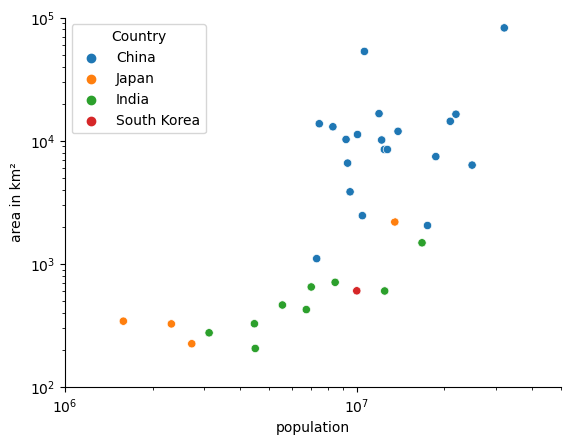

In [42]:
import seaborn as sns  # import Seaborn for plotting

# create columns that we want to use as axes
# also remove citations
df['population'] = df['City proper[c].1'].str.split('[', expand=True)[0].str.replace(',','').astype(float)
df['area in km²'] = df['City proper[c].2'].str.split('[', expand=True)[0].str.replace(',','').astype(float)

# plot the data
ax = sns.scatterplot(df, x='population', y='area in km²',
                     hue='Country',  # plot different countries in different colors
                     hue_order=['China', 'Japan', 'India', 'South Korea']  # only plot these countries, in this order
                     )

# set both axes to log scale and set nice ranges
ax.set(xlim=(1e6,5e7),
       xscale='log',
       ylim=(1e2, 1e5),
       yscale='log')

# remove the top and the right border of the plot
sns.despine()

## Getting structured data from an API

Getting openly available data on expected green energy production for the local zip code from https://www.gruenstromindex.de

In [43]:
url = 'https://gruenstromindex.de/v2.0/gsi/prediction?zip=68161&key=cel_216_1697724028679'

In [44]:
result = requests.get(url).text

In [45]:
result

'{"support":"If you have any question please contact dev@stromdao.com or visit https://premium.corrently.de/","license":"CC BY-NC-SA 4.0 ( https://creativecommons.org/licenses/by-nc-sa/4.0/legalcode.en )","info":"https://corrently.io/books/stromdao-gmbh/page/fair-use-policy","documentation":"https://corrently.io/books/grunstromindex","commercial":"https://corrently.energy/products/corrently-apis-grunstromindex-abrufe","signee":"0xE7Fe0626D7B8e3F2e5ECD146F9b11daac1DBE447","forecast":[{"epochtime":1715151600,"eevalue":0,"ewind":0,"esolar":0,"ensolar":0,"enwind":0,"sci":25,"gsi":0,"timeStamp":1715151600000,"energyprice":"0.0000000","co2_g_standard":349,"co2_g_oekostrom":65,"timeframe":{"start":1715151600000,"end":1715155200000},"iat":1715156165593,"zip":"68161","signature":"0x1b514dff7b81bcfcdc2f2c9d70981f3c9c66ca2808eeaca418a46812faff583b600f74ba6f4b664df8c4e5f3ae5f18565a334e827a0398750044e9f97bd191661c"},{"epochtime":1715155200,"eevalue":59,"ewind":64,"esolar":18,"ensolar":18,"enwind":6

In [46]:
import json
parsed_data = json.loads(result)  # convert the JSON string to a Python dictionary
parsed_data

{'support': 'If you have any question please contact dev@stromdao.com or visit https://premium.corrently.de/',
 'license': 'CC BY-NC-SA 4.0 ( https://creativecommons.org/licenses/by-nc-sa/4.0/legalcode.en )',
 'info': 'https://corrently.io/books/stromdao-gmbh/page/fair-use-policy',
 'documentation': 'https://corrently.io/books/grunstromindex',
 'commercial': 'https://corrently.energy/products/corrently-apis-grunstromindex-abrufe',
 'signee': '0xE7Fe0626D7B8e3F2e5ECD146F9b11daac1DBE447',
 'forecast': [{'epochtime': 1715151600,
   'eevalue': 0,
   'ewind': 0,
   'esolar': 0,
   'ensolar': 0,
   'enwind': 0,
   'sci': 25,
   'gsi': 0,
   'timeStamp': 1715151600000,
   'energyprice': '0.0000000',
   'co2_g_standard': 349,
   'co2_g_oekostrom': 65,
   'timeframe': {'start': 1715151600000, 'end': 1715155200000},
   'iat': 1715156165593,
   'zip': '68161',
   'signature': '0x1b514dff7b81bcfcdc2f2c9d70981f3c9c66ca2808eeaca418a46812faff583b600f74ba6f4b664df8c4e5f3ae5f18565a334e827a0398750044e9f

In [47]:
import pandas as pd
df = pd.DataFrame(parsed_data['forecast'])  # load the forecast as a Pandas DataFrame
df.head()

,epochtime,eevalue,ewind,esolar,ensolar,enwind,sci,gsi,timeStamp,energyprice,co2_g_standard,co2_g_oekostrom,timeframe,iat,zip,signature
0,1715151600,0,0,0,0,0,25,0.00,1715151600000,0.0000000,349,65,"{'start': 1715151600000, 'end': 1715155200000}",1715156165593,68161,0x1b514dff7b81bcfcdc2f2c9d70981f3c9c66ca2808ee...
1,1715155200,59,64,18,18,64,34,56.05,1715155200000,-0.0295000,171,31,"{'start': 1715155200000, 'end': 1715158800000}",1715156165595,68161,0xf798d17cc0fe87230afa70764bd1c1167cb1fc77a123...
2,1715158800,58,62,18,18,62,34,55.10,1715158800000,-0.0290000,174,32,"{'start': 1715158800000, 'end': 1715162400000}",1715156165599,68161,0x576988ca46f61b0fc226f6b313b9026a5b860778120d...
3,1715162400,58,62,18,18,62,34,55.10,1715162400000,-0.0290000,174,32,"{'start': 1715162400000, 'end': 1715166000000}",1715156165601,68161,0xa4a0a5348c88732cbd7c0bc064892f3e7afeadd328b3...
4,1715166000,55,59,18,18,59,34,52.25,1715166000000,-0.0275000,183,34,"{'start': 1715166000000, 'end': 1715169600000}",1715156165603,68161,0xc357be71eafa9be93ed76934b9ff3632b63d0d44a356...


In [48]:
df['time'] = pd.to_datetime(df['epochtime'], unit='s')  # convert the time to datetime format
df[['time', 'ewind', 'esolar', 'eevalue']].head()  # the columns we're interested in

,time,ewind,esolar,eevalue
0,2024-05-08 07:00:00,0,0,0
1,2024-05-08 08:00:00,64,18,59
2,2024-05-08 09:00:00,62,18,58
3,2024-05-08 10:00:00,62,18,58
4,2024-05-08 11:00:00,59,18,55


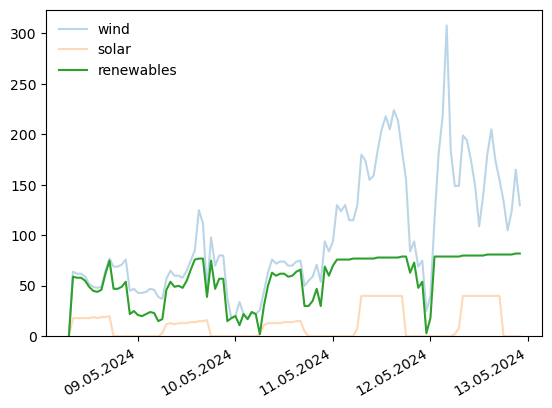

In [49]:
# import pyplot for plotting
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# plot the 3 Series
plt.plot(df['time'], df['ewind'], label='wind', alpha=0.3)
plt.plot(df['time'], df['esolar'], label='solar', alpha=0.3)
plt.plot(df['time'], df['eevalue'], label='renewables')

# add a legend
plt.legend(frameon=False)

# some formatting for the dates on the x-axis
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d.%m.%Y'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator())
plt.gcf().autofmt_xdate()

# make the y-axis start at 0
ax = plt.gca()  # gca() stands for 'get current axis'
ax.set(ylim=(0,None))
plt.show()